In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Read data

In [2]:
N = 1_000_000

In [134]:
# a = np.empty((7, N*10*10), dtype='float64')
# for i in range(10):
#     for j in range(10):
#         a[:,N*(i*10+j) : N*(i*10+j+1)] = np.loadtxt('../build/addition_16_'+str(i)+'_'+str(j)+'.txt', delimiter=',', max_rows=1_000_000).T

# m = np.empty((7, N*10*10), dtype='float64')
# for i in range(10):
#     for j in range(10):
#         m[:,N*(i*10+j) : N*(i*10+j+1)] = np.loadtxt('../build/multiply_16_'+str(i)+'_'+str(j)+'.txt', delimiter=',', max_rows=1_000_000).T

c = np.empty((7, N*10*10), dtype='float64')
for i in range(10):
    for j in range(10):
        c[:,N*(i*10+j) : N*(i*10+j+1)] = np.loadtxt('../build/convert_16_'+str(i)+'_'+str(j)+'.txt', delimiter=',', max_rows=1_000_000).T

### Addition

In [120]:
for k, i in enumerate([a[3], a[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

Posit  &        nan &        nan &        nan &        nan \\
HUB    &        nan &        nan &        nan &        nan \\


In [121]:
# Remove 0's, nan's, cancellative subtractions
aa = a[:, (a[0] != 0) & (a[1] != 0) & (a[2] != 0)]
# aa = a

print(aa[:,np.argmax(aa[3])])
print(aa[:,np.argmin(aa[3])])
print(aa[:,np.argmax(aa[4])])
print(aa[:,np.argmin(aa[4])])

print(aa.shape[1]/a.shape[1])

[-6.27441e-02 -1.25000e-01 -6.24847e-02  9.92218e-01 -4.13424e-03
  1.26281e+02 -1.26344e+02]
[ 6.41346e-05  1.22070e-04  6.11544e-05 -9.03346e-01  4.64684e-02
 -2.33427e-01  2.33491e-01]
[-1.00583e-06 -9.53674e-07 -1.90362e-06 -5.18519e-02  8.92593e-01
 -7.35316e-04  7.34311e-04]
[ 4.97818e-04  4.88281e-04  9.77516e-04  1.91571e-02 -9.63602e-01
 -1.22802e+00  1.22852e+00]
0.99997578


In [122]:
for k, i in enumerate([aa[3], aa[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

Posit  & -9.033e-01 & -3.190e-07 &  9.922e-01 &  2.567e-03 \\
HUB    & -9.636e-01 & -1.738e-05 &  8.926e-01 &  2.556e-03 \\


### Multiplication

In [52]:
for k, i in enumerate([m[3], m[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

Posit  & -2.496e+03 &  5.766e-05 &  2.112e+03 &  7.811e-01 \\
HUB    & -1.550e+02 & -7.923e-06 &  1.311e+02 &  5.168e-02 \\


Let us remove data that are not represntable in Posit16, $|x| \notin [2^{-56}, 2^{56}]$.

In [61]:
print(f'{2**-56:e}, {2**56:e}')
print(m[:,np.argmax(m[3])])
print(m[:,np.argmin(m[3])])

1.387779e-17, 7.205759e+16
[-6.56725e-21 -1.38778e-17 -8.67362e-19  2.11218e+03  1.31074e+02
 -1.09821e-10  5.97993e-11]
[ 5.55843e-21  1.38778e-17  8.67362e-19 -2.49571e+03 -1.55044e+02
  6.42899e-11  8.64588e-11]


In [100]:
mm = m[:, ((2**-56) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**56))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

0.99997717
Posit  & -3.127e+00 & -1.708e-06 &  3.167e+00 &  1.178e-02 \\
HUB    & -1.539e+01 & -9.875e-06 &  3.038e+00 &  1.223e-02 \\


In [44]:
print(f'{2**-56:e}, {2**56:e}')
print(mm[:,np.argmax(mm[3])])
print(mm[:,np.argmin(mm[3])])
print(mm[:,np.argmax(mm[4])])
print(mm[:,np.argmin(mm[4])])

1.387779e-17, 7.205759e+16
[-1.76766e+16 -7.20576e+16 -1.80144e+16  3.07644e+00  1.91109e-02
  2.56635e+07 -6.88783e+08]
[ 5.32998e-17  2.22045e-16  5.55112e-17 -3.16595e+00 -4.14882e-02
  6.26130e-11  8.51258e-07]
[-7.19672e+16 -7.20576e+16 -1.15292e+18  1.25548e-03  1.50201e+01
 -1.25731e+08  5.72391e+08]
[ 4.45444e+15  4.50360e+15  1.80144e+16 -1.10368e-02 -3.04415e+00
  1.15144e+07  3.86859e+08]


Let us remove points $x$ that apply HUB on the regime, i.e. $x \notin [-2^{56}, -2^{-52}] \cup [2^{-56}, 2^{52}]$.  
**REMARK:** The only *all regime cases* are `01...1` and `11...1`; i.e., $maxpos$ and $-minpos$

In [99]:
mm = m[:, ((m[0] > 0) & ((2**-56) <= (m[0])) & ((m[0]) <= (2**52))) | ((m[0] < 0) & ((-2**-52) >= (m[0])) & ((m[0]) >= (-2**56)))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

0.99994867
Posit  & -3.127e+00 & -9.498e-06 &  2.996e+00 &  1.033e-02 \\
HUB    & -2.992e+00 & -4.521e-06 &  3.038e+00 &  1.056e-02 \\


In [48]:
print(f'{-2**56:e}, {-2**-52:e}, {2**-56:e}, {2**52:e}')
print(mm[:,np.argmax(mm[3])])
print(mm[:,np.argmin(mm[3])])
print(mm[:,np.argmax(mm[4])])
print(mm[:,np.argmin(mm[4])])

-7.205759e+16, -2.220446e-16, 1.387779e-17, 4.503600e+15
[-1.76766e+16 -7.20576e+16 -1.80144e+16  3.07644e+00  1.91109e-02
  2.56635e+07 -6.88783e+08]
[ 5.32998e-17  2.22045e-16  5.55112e-17 -3.16595e+00 -4.14882e-02
  6.26130e-11  8.51258e-07]
[-7.19672e+16 -7.20576e+16 -1.15292e+18  1.25548e-03  1.50201e+01
 -1.25731e+08  5.72391e+08]
[ 4.45444e+15  4.50360e+15  1.80144e+16 -1.10368e-02 -3.04415e+00
  1.15144e+07  3.86859e+08]


Let us remove points $x$ that only have regime, i.e. $|x| \notin [2^{-56}, 2^{52}]$.

In [56]:
mm = m[:, ((2**-56) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**52))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

0.99995888
Posit  & -3.127e+00 & -1.044e-06 &  3.167e+00 &  1.107e-02 \\
HUB    & -2.992e+00 & -9.322e-06 &  3.038e+00 &  1.062e-02 \\


Let us remove points $x$ that doesn't have explicit exponent bits, i.e. $|x| \notin [2^{-54}, 2^{50}]$.

In [57]:
mm = m[:, ((2**-54) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**50))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

0.99992125
Posit  & -2.995e+00 & -1.385e-06 &  2.998e+00 &  1.064e-02 \\
HUB    & -1.086e+00 & -8.758e-06 &  1.040e+00 &  9.066e-03 \\


In [80]:
for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

Posit  & -2.995e+00 & -1.385e-06 &  2.998e+00 &  1.064e-02 \\
HUB    & -1.086e+00 & -8.758e-06 &  1.040e+00 &  9.066e-03 \\


Let us remove points $x$ that doesn't have explicit fraction bits, i.e. $|x| \notin [2^{-48}, 2^{47}]$.

In [58]:
print(f'{2**-48:e}, {2**47:e}')

print(m[:,np.argmax(m[3])])
print(m[:,np.argmin(m[3])])
# print(m[:,np.argmax(m[4])])   # Same output
# print(m[:,np.argmin(m[4])])   # Same output

3.552714e-15, 1.407375e+14
[-6.56725e-21 -1.38778e-17 -8.67362e-19  2.11218e+03  1.31074e+02
 -1.09821e-10  5.97993e-11]
[ 5.55843e-21  1.38778e-17  8.67362e-19 -2.49571e+03 -1.55044e+02
  6.42899e-11  8.64588e-11]


In [59]:
mm = m[:, ((2**-48) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**47))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

0.9997312
Posit  & -3.877e-01 & -4.543e-07 &  3.827e-01 &  6.539e-03 \\
HUB    & -5.684e-01 & -8.383e-06 &  5.648e-01 &  7.002e-03 \\


Let us remove points $x$ so that $|x| \notin [2^{-30}, 2^{30}]$.

In [60]:
mm = m[:, ((2**-30) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**30))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

0.98566204
Posit  & -8.385e-02 &  1.862e-07 &  8.662e-02 &  2.165e-03 \\
HUB    & -9.140e-02 & -4.751e-06 &  8.136e-02 &  2.165e-03 \\


Let us remove points $x$ so that $|x| \notin [2^{-39}, 2^{39}]$.

In [6]:
mm = m[:, ((2**-39) <= np.abs(m[0])) & (np.abs(m[0]) <= (2**39))]

print(mm.shape[1]/m.shape[1])

for k, i in enumerate([mm[3], mm[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

0.99790962
Posit  & -1.706e-01 &  1.459e-08 &  1.585e-01 &  3.955e-03 \\
HUB    & -1.856e-01 & -7.079e-06 &  1.816e-01 &  3.974e-03 \\


### Conversion

In [135]:
for k, i in enumerate([c[3], c[4]]):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

Posit  & -5.882e-02 &  8.503e-08 &  5.882e-02 &  1.197e-03 \\
HUB    & -6.250e-02 & -2.529e-06 &  6.198e-02 &  1.199e-03 \\


In [178]:
# del(a)
# del(m)
# # del(mm)
# del(c)

In [68]:
# y = np.loadtxt('../build/add28.txt', delimiter=',').T
# z = np.loadtxt('../build/conv32.txt', delimiter=',').T
# z = np.loadtxt('../build/add32.txt', delimiter=',').T

# z = np.loadtxt('../build/add32_.txt', delimiter=',', max_rows=10000000).T
# y = np.loadtxt('../build/mul32_.txt', delimiter=',', max_rows=10000000).T
# v = np.loadtxt('../build/conv32_.txt', delimiter=',', max_rows=10000000).T

z = np.loadtxt('../build/add16_.txt', delimiter=',', max_rows=10000000).T
y = np.loadtxt('../build/mul16_.txt', delimiter=',', max_rows=10000000).T
v = np.loadtxt('../build/conv16_.txt', delimiter=',', max_rows=10000000).T

# z[0]: Exact result
# z[1]: Posit result
# z[2]: HUB result
# z[3]: Posit error
# z[4]: HUB error

In [3]:
a = np.loadtxt('../build/add.txt', delimiter=',').T
m = np.loadtxt('../build/mul.txt', delimiter=',').T
c = np.loadtxt('../build/conv.txt', delimiter=',').T

In [324]:
print(f"{'Format':<6} & {'min':>10} & {'mean':>10} & {'max':>10} & {'std':>10} \\\\")

for k, i in enumerate(a):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

for k, i in enumerate(m):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

for k, i in enumerate(c):
    print(f"{('Posit' if k == 0 else 'HUB'):<6} & {i.min():>10.3e} & {i.mean():>10.3e} & {i.max():>10.3e} & {i.std():>10.3e} \\\\")

Format &        min &       mean &        max &        std \\
Posit  & -4.191e-09 &  1.653e-12 &  4.191e-09 &  1.349e-09 \\
HUB    & -4.657e-09 & -6.168e-10 &  2.794e-09 &  1.290e-09 \\
Posit  & -5.389e-09 &  1.214e-12 &  5.340e-09 &  8.572e-10 \\
HUB    & -5.299e-09 & -1.054e-12 &  5.427e-09 &  8.591e-10 \\
Posit  & -1.863e-09 &  5.807e-13 &  1.863e-09 &  8.128e-10 \\
HUB    & -1.863e-09 & -9.018e-13 &  1.863e-09 &  8.129e-10 \\


# Plot results

## Addition

In [123]:
add_p = aa[3]
add_h = aa[4]

del(a)
del(aa)

print((np.min(add_p), np.max(add_p)), "U", (np.min(add_h), np.max(add_h)), "=")
r_min = min(np.min(add_p), np.min(add_h))
r_max = max(np.max(add_p), np.max(add_h))
r_min, r_max

(-0.903346, 0.992218) U (-0.963602, 0.892593) =


(-0.963602, 0.992218)

In [130]:
for frmt in [add_p,add_h]:
    print(np.histogram(frmt, bins=60000, range=(r_min, r_max))[0].max())

5892496
5958939


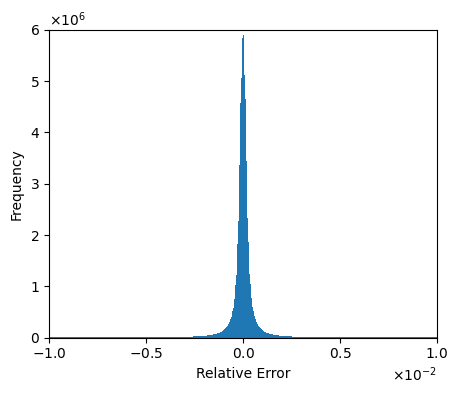

In [133]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32')
ax.hist(add_p, bins=60000, range=(r_min, r_max), color='#1f77b4')

xmax = 1e-02
xmin = -xmax
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 6e6)

ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_add_posit.pdf', bbox_inches='tight')
plt.show()

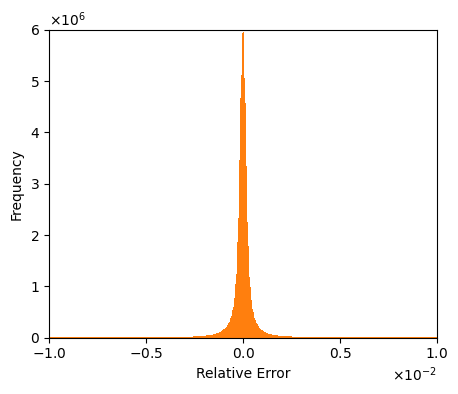

In [132]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32 HUB')
ax.hist(add_h, bins=60000, range=(r_min, r_max), color='#ff7f0e')

xmax = 1e-02
xmin = -xmax
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 6e6)

ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_add_hub.pdf', bbox_inches='tight')
plt.show()

## Conversion

In [136]:
conv_p = c[3]
conv_h = c[4]

del(c)

print((np.min(conv_p), np.max(conv_p)), "U", (np.min(conv_h), np.max(conv_h)), "=")
r_min = min(np.min(conv_p), np.min(conv_h))
r_max = max(np.max(conv_p), np.max(conv_h))
r_min, r_max

(-0.0588235, 0.0588235) U (-0.0625, 0.0619815) =


(-0.0625, 0.0619815)

In [137]:
for frmt in [conv_p,conv_h]:
    print(np.histogram(frmt, bins=20000, range=(r_min, r_max))[0].max())

1305908
1305251


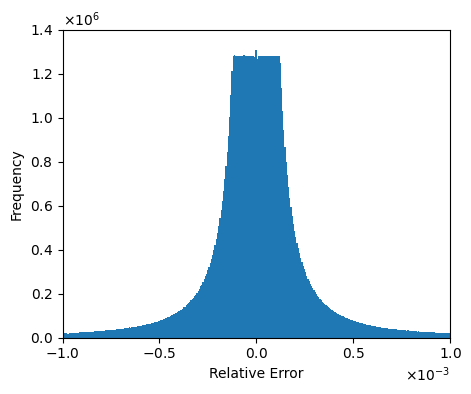

In [140]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32')
ax.hist(conv_p, bins=20000, range=(r_min, r_max), color='#1f77b4')

xmax = 1e-03
xmin = -xmax
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 1.4e6)

ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_conv_posit.pdf', bbox_inches='tight')
plt.show()

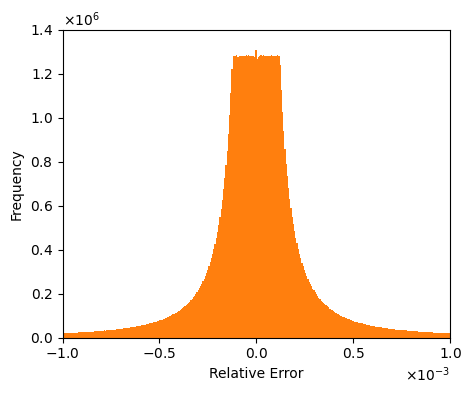

In [139]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32 HUB')
ax.hist(conv_h, bins=20000, range=(r_min, r_max), color='#ff7f0e')

xmax = 1e-03
xmin = -xmax
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 1.4e6)

ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_conv_hub.pdf', bbox_inches='tight')
plt.show()

## Multiplication

In [118]:
mul_p = mm[3]
mul_h = mm[4]

del(m)
del(mm)

print((np.min(mul_p), np.max(mul_p)), "U", (np.min(mul_h), np.max(mul_h)), "=")
r_min = min(np.min(mul_p), np.min(mul_h))
r_max = max(np.max(mul_p), np.max(mul_h))
r_min, r_max

(-3.12694, 3.16707) U (-15.3907, 3.03817) =


(-15.3907, 3.16707)

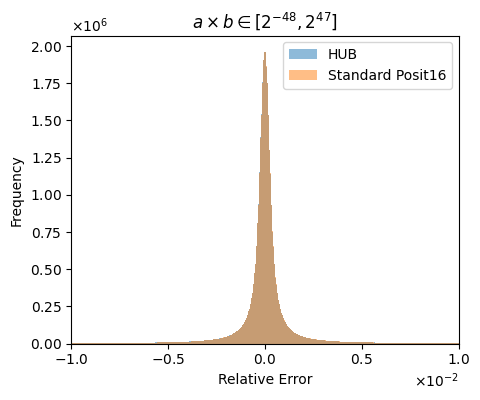

In [12]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

ax.set_title(r'$a\times b \in [2^{-48}, 2^{47}]$')
ax.hist(mul_h, bins=60000, range=(r_min, r_max), alpha=0.5, label='HUB')#, color='b')
ax.hist(mul_p, bins=60000, range=(r_min, r_max), alpha=0.5, label='Standard Posit16')#, color='b')

xmax = 1e-02
# xmax = 0.5
xmin = -xmax
ax.set_xlim(xmin, xmax)
# ax.set_ylim(0, 3e5)

ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText='True')

plt.legend()
plt.savefig('figs/compare_err_mul_posit_30.pdf', bbox_inches='tight')
plt.show()

In [114]:
for frmt in [mul_p,mul_h]:
    print(np.histogram(frmt, bins=250000, range=(r_min, r_max))[0].max())

7480365
7477336


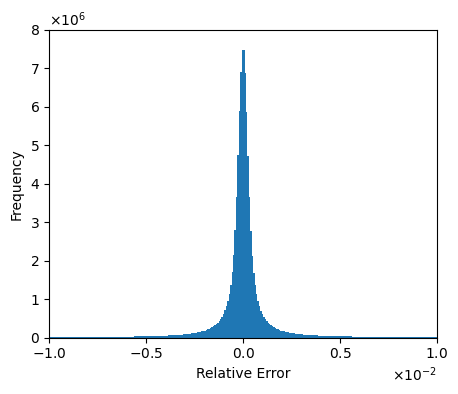

In [112]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32')
# ax.hist(mul_p, bins=60000, range=(r_min, r_max))#, color='b')
ax.hist(mul_p, bins=250000, range=(r_min, r_max), color='#1f77b4')

xmax = 1e-02
xmin = -xmax
ax.set_xlim(xmin, xmax)
# ax.set_ylim(0, 3e7)
ax.set_ylim(0, 8e6)

ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_mul_posit.pdf', bbox_inches='tight')
plt.show()

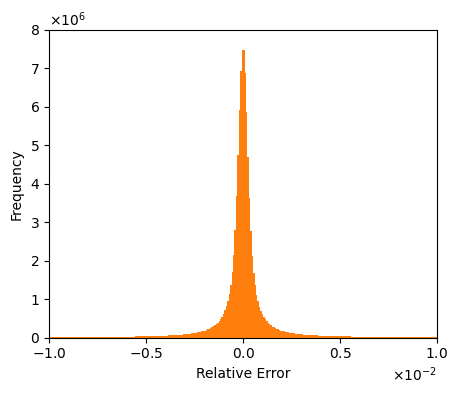

In [115]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_xlabel('Relative Error')
ax.set_ylabel('Frequency')

# ax.set_title('Posit32 HUB')
ax.hist(mul_h, bins=250000, range=(r_min, r_max), color='#ff7f0e')

xmax = 1e-02
xmin = -xmax
ax.set_xlim(xmin, xmax)
# ax.set_ylim(0, 3e7)
ax.set_ylim(0, 8e6)

ax.set_xticks(ticks=np.arange(xmin, xmax+1e-7, xmax/2))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText='True')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText='True')


plt.savefig('figs/rel_err_mul_hub.pdf', bbox_inches='tight')
plt.show()